In [1]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data sets- train and test 
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Print the column names of train datadf.columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [5]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

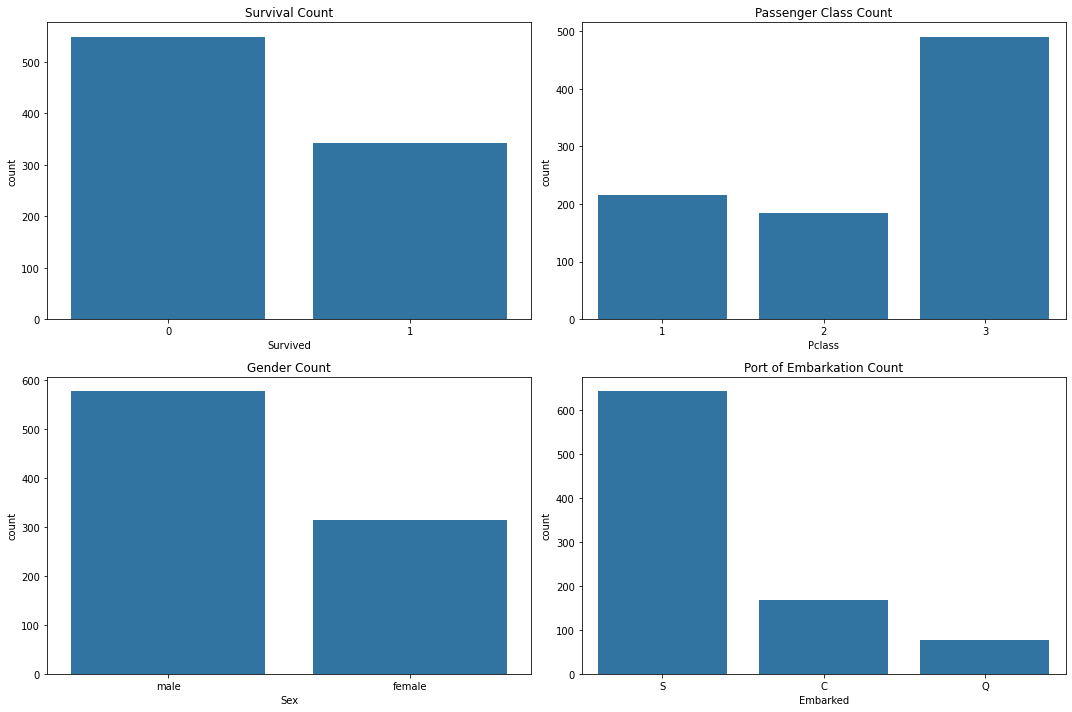

In [6]:
#Barchart of Survived, Pclass, Sex, Embarked
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')

plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')

plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation Count')

# Adjust layout
plt.tight_layout()
plt.show()

    

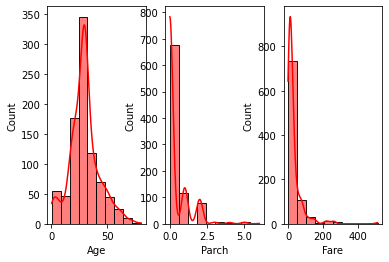

In [7]:
#Histogram of Age, Parch, Fare

columns=['Age','Parch','Fare']
df['Age'].fillna(df['Age'].mean(),inplace=True)
for i,col in enumerate(columns,1):
    plt.subplot(1,3,i)
    sns.histplot(df[col],bins=10,kde=True,color='red')
plt.show()

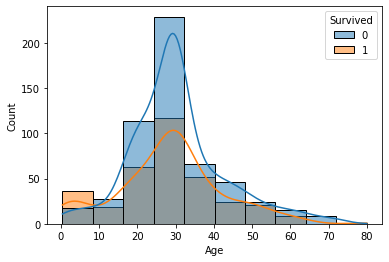

In [23]:
#Plot histogram of age for survived and did not survived class
sns.histplot(data=df,x='Age',hue="Survived",bins=10,kde=True)
plt.show()

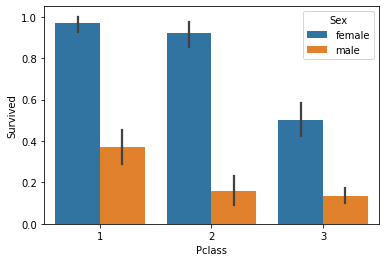

In [8]:
#Count class and geder wise survival rate - plot with appropriate chart
sns.barplot(data=df,x='Pclass',y='Survived',hue="Sex")
plt.show()

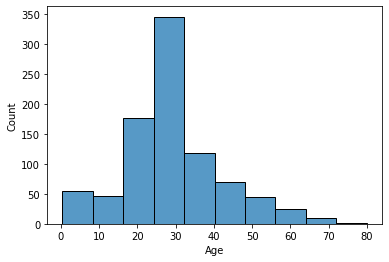

In [9]:
#Histogram of Age of the given data set(sample)
sns.histplot(data=df,x='Age',bins=10)
plt.show()

In [11]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'].fillna('S',inplace=True)

In [12]:
#Impute the missing values in Fare column with median value
df['Fare'].fillna(df['Fare'].median())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [14]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np
age_mean=df['Age'].mean()
age_std=df['Age'].std()
num_missing=df['Age'].isnull().sum()
random_values=np.random.normal(loc=age_mean,scale=age_std,size=num_missing)
df.loc[df['Age'].isnull(),'Age']=random_values
df['Age'].isnull().sum()

0

In [15]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['familysize']=df['Parch']+df['SibSp']+1


In [16]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['isalone']=df['familysize']==1


In [18]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(columns=['PassengerId','Name','Ticket','Cabin'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familysize,isalone
0,0,3,male,22.000000,1,0,7.2500,S,2,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False
2,1,3,female,26.000000,0,0,7.9250,S,1,True
3,1,1,female,35.000000,1,0,53.1000,S,2,False
4,0,3,male,35.000000,0,0,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True
887,1,1,female,19.000000,0,0,30.0000,S,1,True
888,0,3,female,29.699118,1,2,23.4500,S,4,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True


In [19]:
#Prepare X and y
# Define X (features) and y (target)
x=df.drop(columns='Survived')
y=df['Survived']

In [20]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
cat_rows=df.select_dtypes(include=['object']).columns
label_encoders={}
for i in cat_rows:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    lebel_encoder=le


In [ ]:
# concat df_categorical with original df


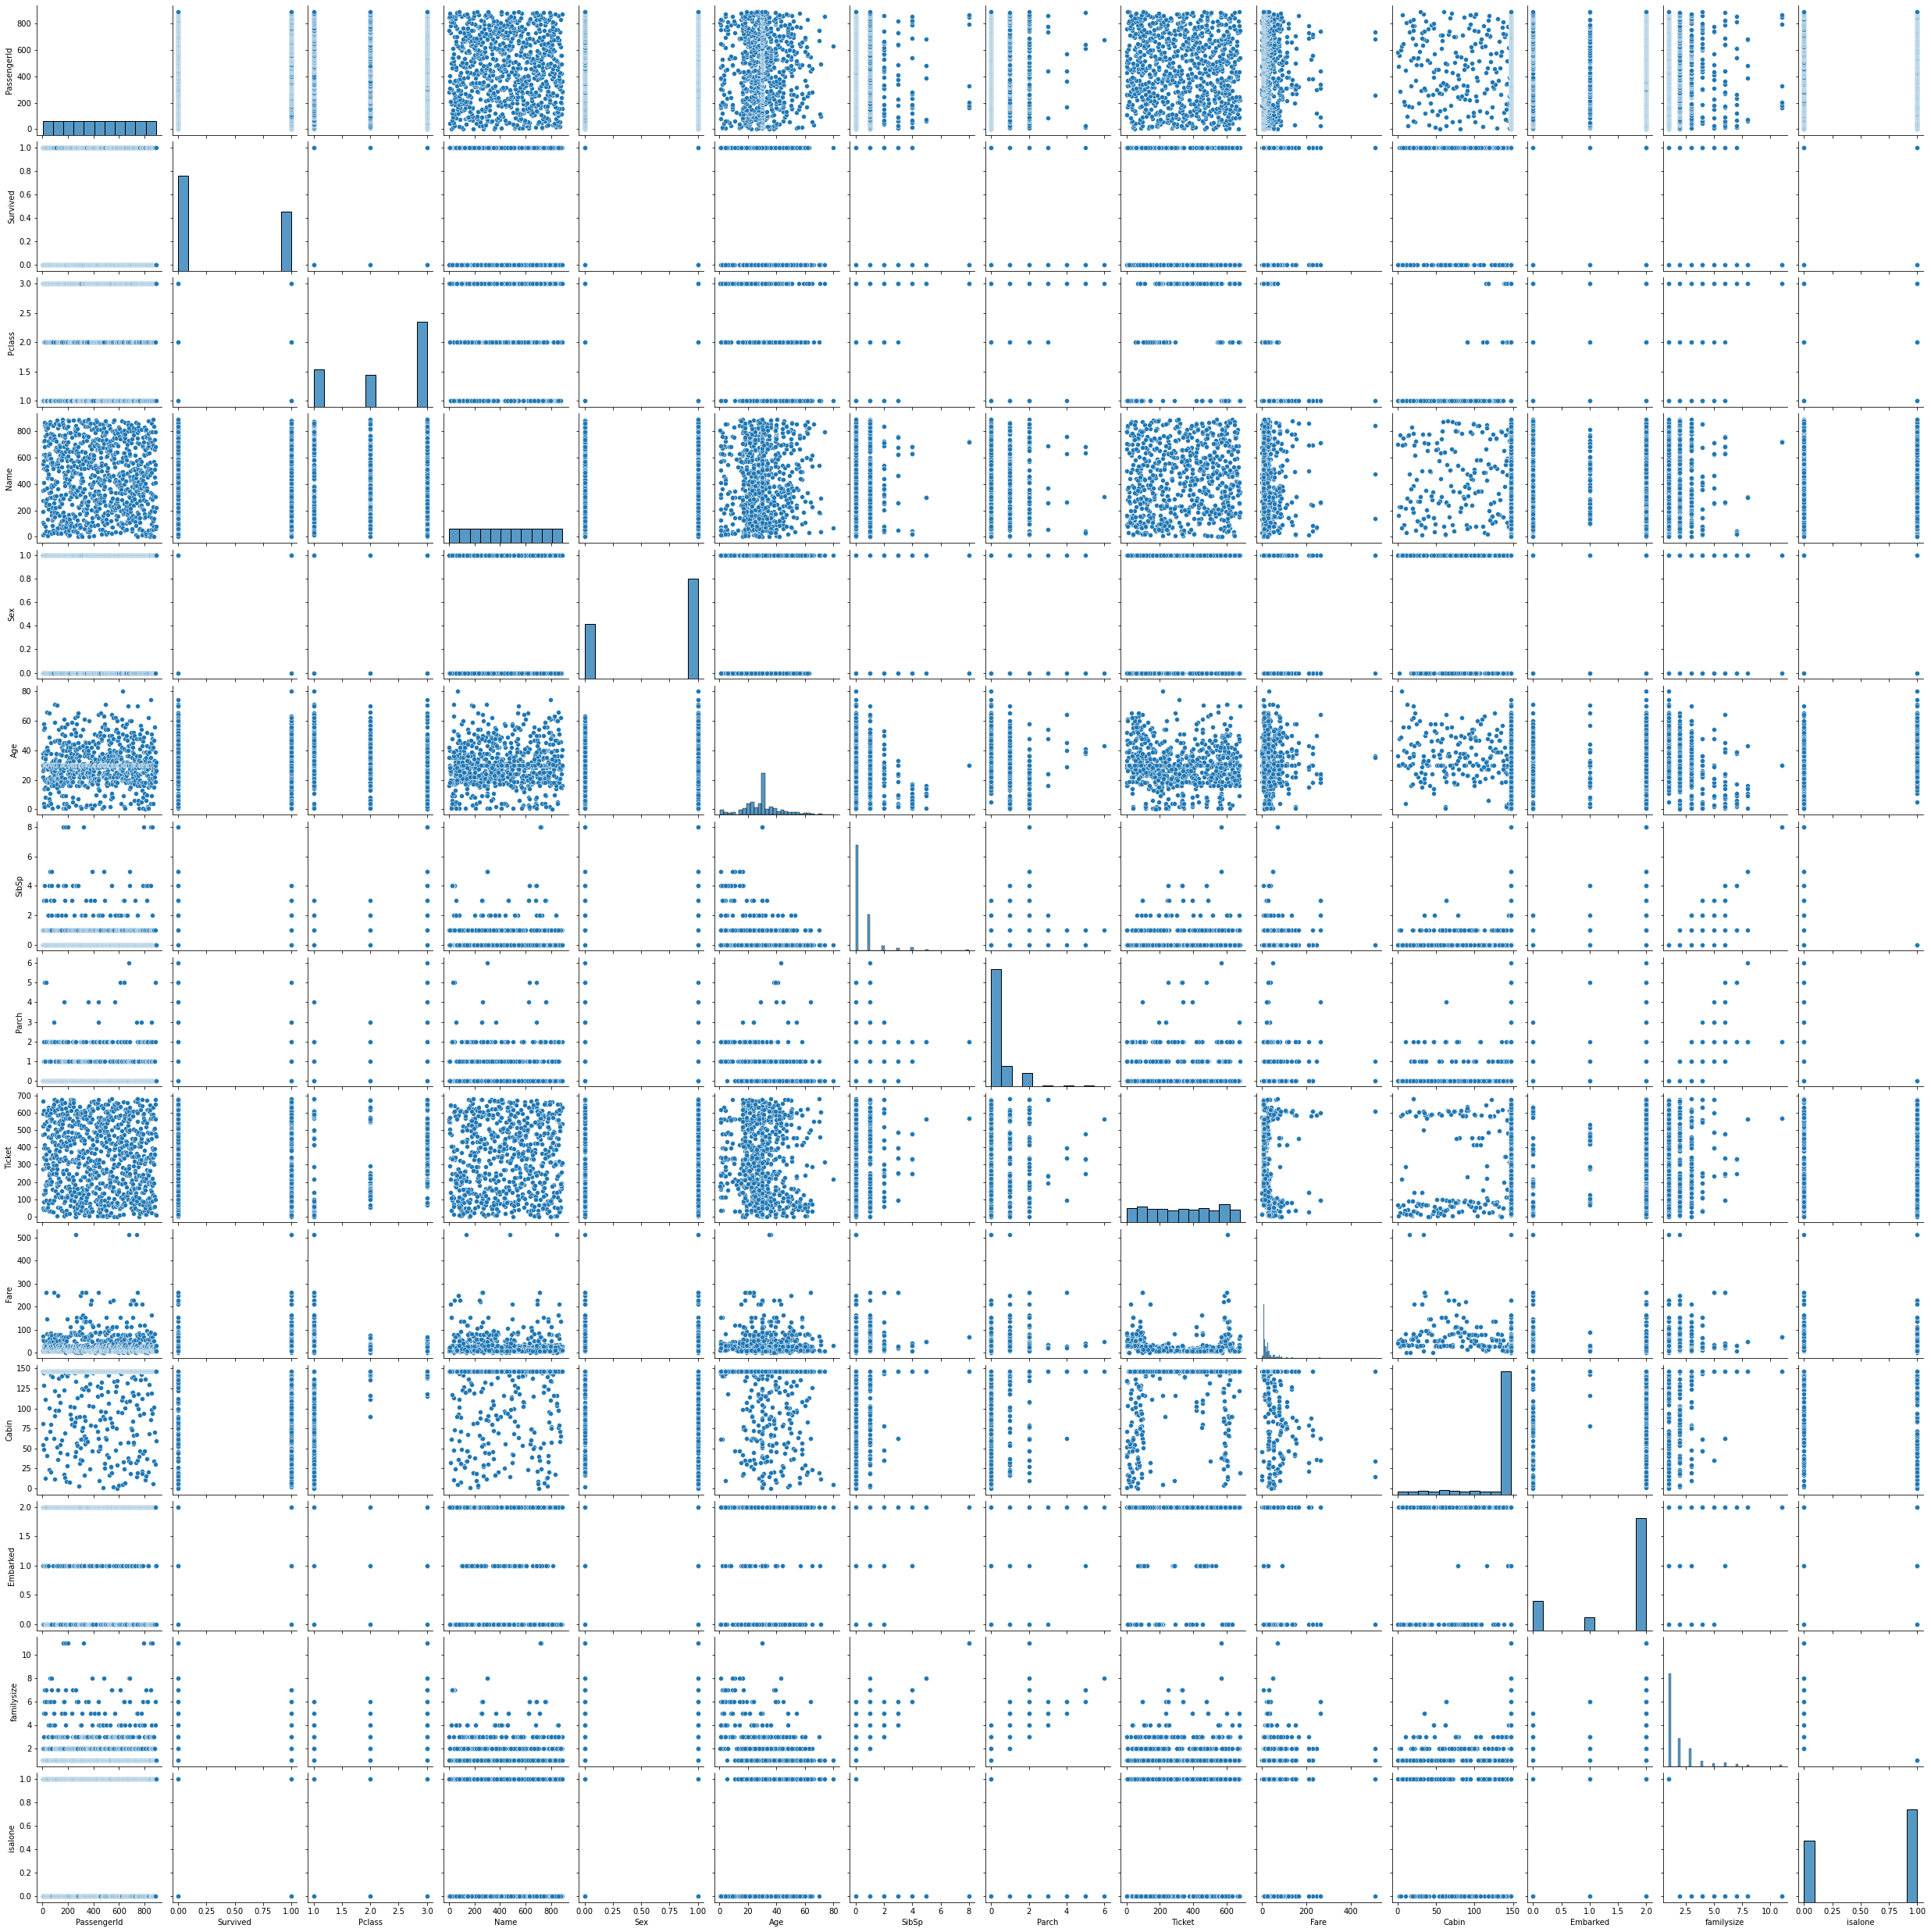

In [25]:
#Do a pairplot of all features
sns.pairplot(df)
plt.show()

In [26]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)
x_train.shape,y_train.shape


((801, 13), (801,))

In [29]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df=df.dropna()
x=df.drop(columns='Survived')
y=df['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)
x_train.shape,y_train.shape

model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

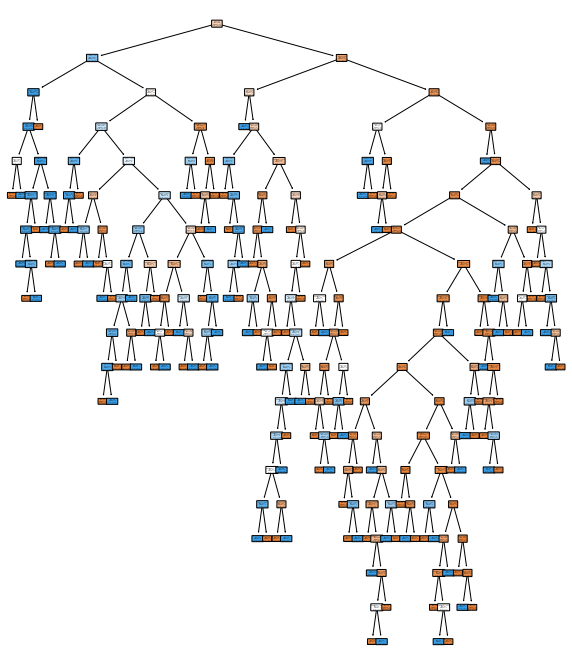

In [31]:
#Print the tree

# Importing required packages for visualization
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(10,12))
plot_tree(model,feature_names=x.columns,class_names=['Survived','Not Survived'],filled=True,rounded=True)
plt.show()


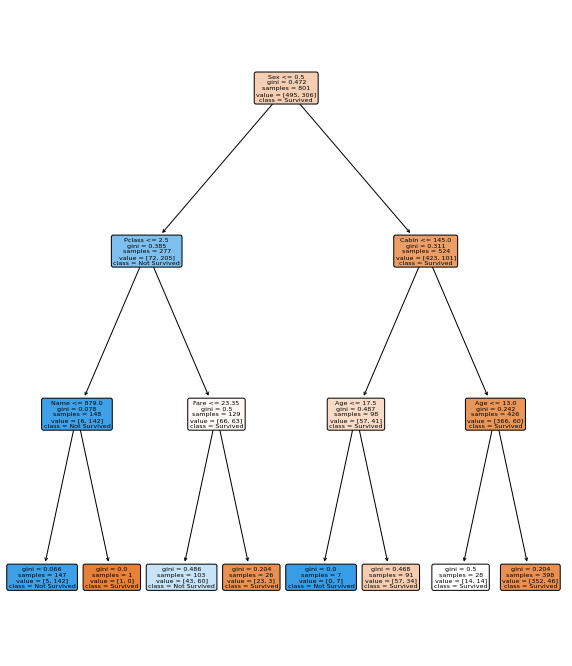

In [32]:
# plotting tree with max_depth=3
model=DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(x_train,y_train)
plt.figure(figsize=(10,12))
plot_tree(model,feature_names=x.columns,class_names=['Survived','Not Survived'],filled=True,rounded=True)
plt.show()


In [38]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cr)
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

0.8333333333333334


In [39]:
# Printing confusion matrix and accuracy
print(cm)
print(accuracy_score(y_test,y_pred))

[[46  8]
 [ 7 29]]
0.8333333333333334


In [ ]:
x.dty